## Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [2]:
humidity_df = pd.read_csv('weather/humidity.csv')
pressure_df = pd.read_csv('weather/pressure.csv')
temperature_df = pd.read_csv('weather/temperature.csv')
weather_description_df = pd.read_csv('weather/weather_description.csv')
wind_direction_df = pd.read_csv('weather/wind_direction.csv')
wind_speed_df = pd.read_csv('weather/wind_speed.csv')
wind_direction_df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0


In [3]:
humidity = humidity_df[['datetime', 'New York']]
pressure = pressure_df[['datetime', 'New York']]
temperature = temperature_df[['datetime', 'New York']]
weather_description = weather_description_df[['datetime', 'New York']]
wind_direction = wind_direction_df[['datetime', 'New York']]
wind_speed = wind_speed_df[['datetime', 'New York']]

## Merging Data

In [4]:
weather_df = (weather_description.merge(humidity, on = 'datetime')
             .merge(pressure, on = 'datetime')
             .merge(temperature, on = 'datetime')
             .merge(wind_direction, on = 'datetime')
             .merge(wind_speed, on = 'datetime')
             )
weather_df.columns = ['Datetime', 'Description', 'Humidity', 'Pressure', 'Temperature', 'Wind_Direction', 'Wind_Speed']
#weather_df['Temperature_C'] = weather_df['Temperature'] 
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,few clouds,58.0,1012.0,288.220000,260.0,7.0
2,2012-10-01 14:00:00,few clouds,57.0,1012.0,288.247676,260.0,7.0
3,2012-10-01 15:00:00,few clouds,57.0,1012.0,288.326940,260.0,7.0
4,2012-10-01 16:00:00,few clouds,57.0,1012.0,288.406203,260.0,7.0


In [68]:
weather_df['Description'].value_counts()

sky is clear                           12394
broken clouds                           6263
mist                                    5415
scattered clouds                        4595
overcast clouds                         4481
light rain                              4002
few clouds                              3329
fog                                     1085
moderate rain                            950
haze                                     691
light intensity drizzle                  408
light snow                               383
heavy intensity rain                     372
drizzle                                  224
heavy snow                               130
proximity thunderstorm                   114
snow                                      99
very heavy rain                           94
thunderstorm                              74
thunderstorm with light rain              36
dust                                      21
thunderstorm with rain                    20
heavy inte

In [5]:
weather_df.shape

(45253, 7)

In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Datetime        45253 non-null  object 
 1   Description     44460 non-null  object 
 2   Humidity        43629 non-null  float64
 3   Pressure        44212 non-null  float64
 4   Temperature     44460 non-null  float64
 5   Wind_Direction  44460 non-null  float64
 6   Wind_Speed      44460 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [7]:
weather_df.describe()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
count,43629.000000,44212.000000,44460.000000,44460.000000,44460.000000
mean,66.642417,1017.018977,285.400406,196.250247,3.210954
std,19.874727,10.125738,10.220932,107.433676,2.189716
min,10.000000,959.000000,250.774000,0.000000,0.000000
25%,51.000000,1012.000000,277.370000,104.000000,2.000000
50%,68.000000,1017.000000,285.870000,220.000000,3.000000
75%,83.000000,1023.000000,293.760000,289.000000,4.000000
max,100.000000,1052.000000,310.240000,360.000000,25.000000


In [8]:
weather_df['Datetime'] = weather_df['Datetime'].apply(lambda x:(x.split(' ')[0]))
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed
0,2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01,few clouds,58.0,1012.0,288.220000,260.0,7.0
2,2012-10-01,few clouds,57.0,1012.0,288.247676,260.0,7.0
3,2012-10-01,few clouds,57.0,1012.0,288.326940,260.0,7.0
4,2012-10-01,few clouds,57.0,1012.0,288.406203,260.0,7.0


In [9]:
#Convert dates to datetime format
weather_df['Datetime'] = pd.to_datetime(weather_df['Datetime']);
weather_df['Datetime'].head()

0   2012-10-01
1   2012-10-01
2   2012-10-01
3   2012-10-01
4   2012-10-01
Name: Datetime, dtype: datetime64[ns]

In [10]:
date = pd.DatetimeIndex(weather_df['Datetime'])
weather_df['Year'] = date.year
weather_df['Month'] = date.month
weather_df['Day'] = date.day
#weather_df['Hour'] = date.hour
#weather_df['Minute'] = date.minute
#weather_df['Second'] = date.second

In [11]:
weather_df.head()

,Datetime,Description,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Year,Month,Day
0,2012-10-01,NaN,NaN,NaN,NaN,NaN,NaN,2012,10,1
1,2012-10-01,few clouds,58.0,1012.0,288.220000,260.0,7.0,2012,10,1
2,2012-10-01,few clouds,57.0,1012.0,288.247676,260.0,7.0,2012,10,1
3,2012-10-01,few clouds,57.0,1012.0,288.326940,260.0,7.0,2012,10,1
4,2012-10-01,few clouds,57.0,1012.0,288.406203,260.0,7.0,2012,10,1


In [12]:
#Missing values and its percentage
missing_data = weather_df.isnull().sum().sort_values(ascending=False)
percentage_missing_data = weather_df.isnull().sum()/weather_df.isnull().count().sort_values(ascending = False) * 100
missing_values = pd.concat([missing_data, percentage_missing_data], axis=1, keys=['missing_data', 'percentage'])
missing_values

,missing_data,percentage
Humidity,1624,3.588712
Pressure,1041,2.300400
Wind_Speed,793,1.752370
Wind_Direction,793,1.752370
Temperature,793,1.752370
Description,793,1.752370
Day,0,0.000000
Month,0,0.000000
Year,0,0.000000
Datetime,0,0.000000


In [13]:
#Filling the numerical Null values with median
weather_df['Humidity'] = weather_df['Humidity'].fillna(weather_df['Humidity'].median())
weather_df['Pressure'] = weather_df['Pressure'].fillna(weather_df['Pressure'].median())
weather_df['Temperature'] = weather_df['Temperature'].fillna(weather_df['Temperature'].median())
weather_df['Wind_Direction'] = weather_df['Wind_Direction'].fillna(weather_df['Wind_Direction'].median())
weather_df['Wind_Speed'] = weather_df['Wind_Speed'].fillna(weather_df['Wind_Speed'].median())

In [14]:
#Filling the categorical values with mode
weather_df['Description'] = weather_df['Description'].fillna(weather_df['Description'].mode()[0])

In [15]:
weather_df.isnull().sum()

Datetime          0
Description       0
Humidity          0
Pressure          0
Temperature       0
Wind_Direction    0
Wind_Speed        0
Year              0
Month             0
Day               0
dtype: int64

In [16]:
weather_df.shape

(45253, 10)

In [17]:
df = weather_df.groupby('Datetime').median()

In [18]:
df.shape

(1887, 8)

In [19]:
df.head()

,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Year,Month,Day
Datetime,,,,,,,,
2012-10-01,56.5,1012.0,288.525098,261.0,6.0,2012,10,1
2012-10-02,52.5,1012.0,289.951841,267.0,5.0,2012,10,2
2012-10-03,63.0,1015.0,290.035000,95.0,3.0,2012,10,3
2012-10-04,96.5,1017.0,290.735000,40.0,2.0,2012,10,4
2012-10-05,94.0,1020.0,293.900000,45.0,1.5,2012,10,5


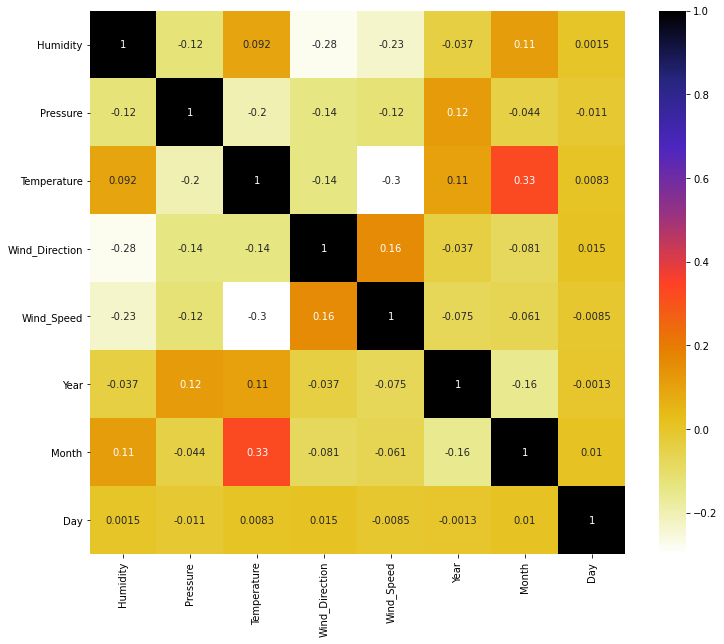

In [20]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

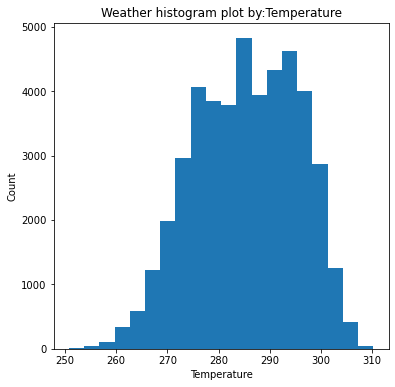

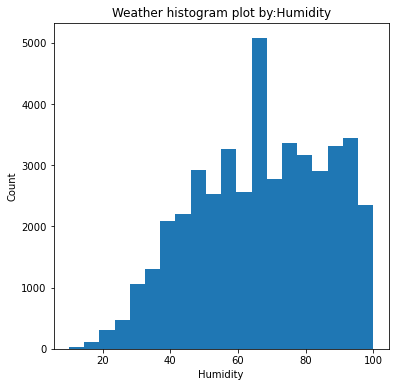

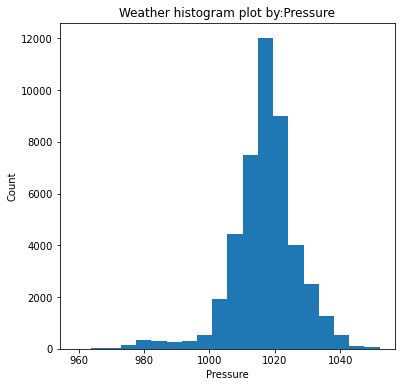

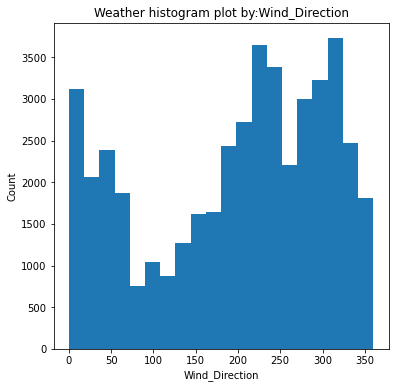

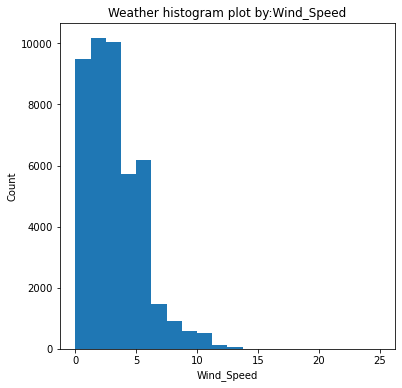

In [21]:
#Histograms look at distribution of numeric data
def plot_histogram(df, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()
        bins = 20
        weather_df[col].plot.hist(ax=ax, bins=bins)
        ax.set_title("Weather histogram plot by:" + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        plt.show()
   
plt_cols = ['Temperature', 'Humidity', 'Pressure', 'Wind_Direction', 'Wind_Speed']
plot_histogram(df, plt_cols)

###  Importing New York's Cab Dataset

In [22]:
newyork_df = pd.read_csv("newy.csv")
newyork_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [23]:
newyork_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [24]:
newyork_df['Datetime'] = newyork_df['pickup_datetime'].apply(lambda x:(x.split(' ')[0]))

In [25]:
newyork_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Datetime
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26


In [26]:
newyork_df['Datetime'] = pd.to_datetime(newyork_df['Datetime']);
newyork_df['Datetime'].head()

0   2016-03-14
1   2016-06-12
2   2016-01-19
3   2016-04-06
4   2016-03-26
Name: Datetime, dtype: datetime64[ns]

In [27]:
newyork_df.isnull().sum().sort_values(ascending = False)

Datetime              0
trip_duration         0
store_and_fwd_flag    0
dropoff_latitude      0
dropoff_longitude     0
pickup_latitude       0
pickup_longitude      0
passenger_count       0
dropoff_datetime      0
pickup_datetime       0
vendor_id             0
id                    0
dtype: int64

In [28]:
newyork_df.shape

(1458644, 12)

In [29]:
newyork_df1 = newyork_df.groupby('Datetime').sum()

In [30]:
newyork_df1.shape

(182, 7)

In [31]:
newyork_df1.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
Datetime,,,,,,,
2016-01-01,11256,12877,-529787.493660,291847.355373,-529769.169426,291857.018768,6593910
2016-01-02,10119,11671,-481707.974754,265362.615917,-481717.639336,265367.305843,5470632
2016-01-03,9790,11041,-469931.703781,258875.673641,-469947.703094,258890.361111,5874410
2016-01-04,10272,11069,-497439.324265,274055.706573,-497463.998703,274061.723618,5723773
2016-01-05,11086,11837,-532885.041077,293578.418682,-532899.542023,293587.086224,10484304


In [32]:
newyork_data = newyork_df1.to_csv('newyork_data', index = True)

In [33]:
newyork_weather = df.to_csv('newyork_weather', index = True)

In [34]:
weather = pd.read_csv('newyork_weather')
weather.head()

,Datetime,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Year,Month,Day
0,2012-10-01,56.5,1012.0,288.525098,261.0,6.0,2012,10,1
1,2012-10-02,52.5,1012.0,289.951841,267.0,5.0,2012,10,2
2,2012-10-03,63.0,1015.0,290.035000,95.0,3.0,2012,10,3
3,2012-10-04,96.5,1017.0,290.735000,40.0,2.0,2012,10,4
4,2012-10-05,94.0,1020.0,293.900000,45.0,1.5,2012,10,5


In [35]:
cabs = pd.read_csv('newyork_data')
cabs.head()

,Datetime,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,2016-01-01,11256,12877,-529787.493660,291847.355373,-529769.169426,291857.018768,6593910
1,2016-01-02,10119,11671,-481707.974754,265362.615917,-481717.639336,265367.305843,5470632
2,2016-01-03,9790,11041,-469931.703781,258875.673641,-469947.703094,258890.361111,5874410
3,2016-01-04,10272,11069,-497439.324265,274055.706573,-497463.998703,274061.723618,5723773
4,2016-01-05,11086,11837,-532885.041077,293578.418682,-532899.542023,293587.086224,10484304


In [36]:
cabs.Datetime.unique()

array(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
       '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
       '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
       '2016-01-13', '2016-01-14', '2016-01-15', '2016-01-16',
       '2016-01-17', '2016-01-18', '2016-01-19', '2016-01-20',
       '2016-01-21', '2016-01-22', '2016-01-23', '2016-01-24',
       '2016-01-25', '2016-01-26', '2016-01-27', '2016-01-28',
       '2016-01-29', '2016-01-30', '2016-01-31', '2016-02-01',
       '2016-02-02', '2016-02-03', '2016-02-04', '2016-02-05',
       '2016-02-06', '2016-02-07', '2016-02-08', '2016-02-09',
       '2016-02-10', '2016-02-11', '2016-02-12', '2016-02-13',
       '2016-02-14', '2016-02-15', '2016-02-16', '2016-02-17',
       '2016-02-18', '2016-02-19', '2016-02-20', '2016-02-21',
       '2016-02-22', '2016-02-23', '2016-02-24', '2016-02-25',
       '2016-02-26', '2016-02-27', '2016-02-28', '2016-02-29',
       '2016-03-01', '2016-03-02', '2016-03-03', '2016-

In [37]:
cabs2 = cabs[['Datetime', 'passenger_count']]
cabs2

,Datetime,passenger_count
0,2016-01-01,12877
1,2016-01-02,11671
2,2016-01-03,11041
3,2016-01-04,11069
4,2016-01-05,11837
...,...,...
177,2016-06-26,12110
178,2016-06-27,11985
179,2016-06-28,11748
180,2016-06-29,12484


In [38]:
full_data = (weather.merge(cabs2, on='Datetime'))

In [39]:
full_data.shape

(182, 10)

In [40]:
full_data.head(20)

,Datetime,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Year,Month,Day,passenger_count
0,2016-01-01,60.0,1018.0,277.295140,270.0,4.5,2016,1,1,12877
1,2016-01-02,51.0,1018.0,274.499211,259.0,4.0,2016,1,2,11671
2,2016-01-03,60.0,1012.5,273.680139,243.5,3.0,2016,1,3,11041
3,2016-01-04,53.0,1016.0,271.815000,320.0,5.0,2016,1,4,11069
4,2016-01-05,45.0,1034.0,263.653505,340.0,5.5,2016,1,5,11837
5,2016-01-06,42.5,1036.0,267.345069,240.0,2.0,2016,1,6,12181
6,2016-01-07,39.5,1028.0,271.990000,235.0,1.0,2016,1,7,12587
7,2016-01-08,59.0,1023.0,274.532774,33.5,3.0,2016,1,8,13555
8,2016-01-09,78.0,1022.0,278.401745,47.5,3.0,2016,1,9,14880
9,2016-01-10,93.0,1005.5,281.708940,92.0,4.0,2016,1,10,12664


In [41]:
full_data.tail(20)

,Datetime,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Year,Month,Day,passenger_count
162,2016-06-11,42.0,1015.0,292.980,284.0,3.0,2016,6,11,13937
163,2016-06-12,48.5,1003.5,299.080,275.0,4.0,2016,6,12,12314
164,2016-06-13,50.0,1008.5,290.955,327.5,4.0,2016,6,13,11584
165,2016-06-14,51.5,1012.0,291.810,330.5,3.0,2016,6,14,12567
166,2016-06-15,39.5,1014.0,295.300,296.0,1.0,2016,6,15,13251
167,2016-06-16,63.5,1008.0,294.415,235.0,1.0,2016,6,16,13723
168,2016-06-17,64.5,1010.5,293.550,176.0,1.0,2016,6,17,13435
169,2016-06-18,43.5,1021.5,293.075,183.5,1.0,2016,6,18,13164
170,2016-06-19,55.5,1025.0,295.690,151.0,2.0,2016,6,19,12050
171,2016-06-20,65.5,1022.0,294.415,160.0,3.0,2016,6,20,11285


In [42]:
import seaborn as sns
sns.set_theme(style="whitegrid")

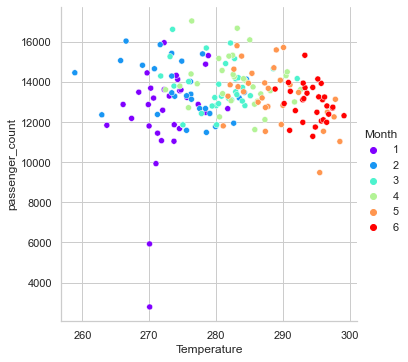

In [43]:
sns.relplot(x="Temperature", y="passenger_count", hue='Month', palette ='rainbow',data=full_data)

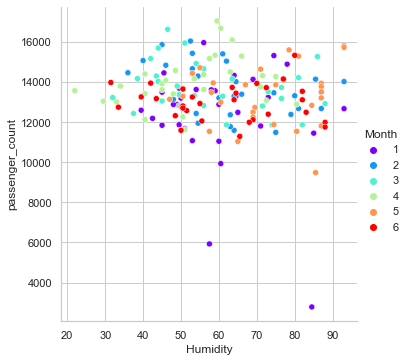

In [44]:
sns.relplot(x="Humidity", y="passenger_count", hue='Month', palette ='rainbow',data=full_data)


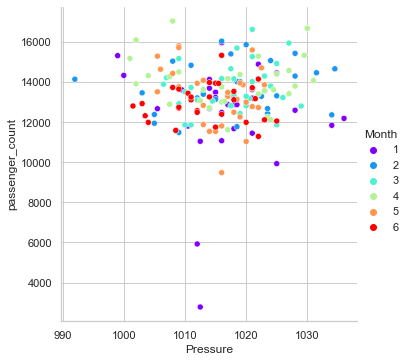

In [45]:
sns.relplot(x="Pressure", y="passenger_count",hue='Month', palette ='rainbow', data=full_data)


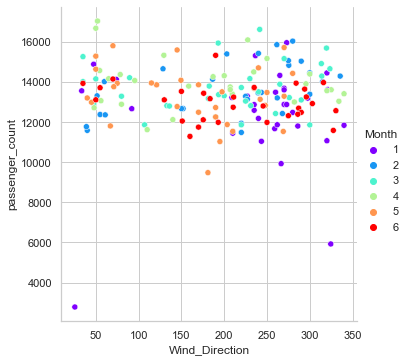

In [46]:
sns.relplot(x="Wind_Direction", y="passenger_count",hue='Month', palette ='rainbow', data=full_data)


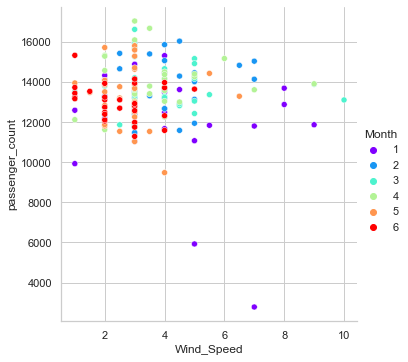

In [47]:
sns.relplot(x="Wind_Speed", y="passenger_count", hue='Month', palette ='rainbow',data=full_data)


In [48]:
full_data.columns

Index(['Datetime', 'Humidity', 'Pressure', 'Temperature', 'Wind_Direction',
       'Wind_Speed', 'Year', 'Month', 'Day', 'passenger_count'],
      dtype='object')

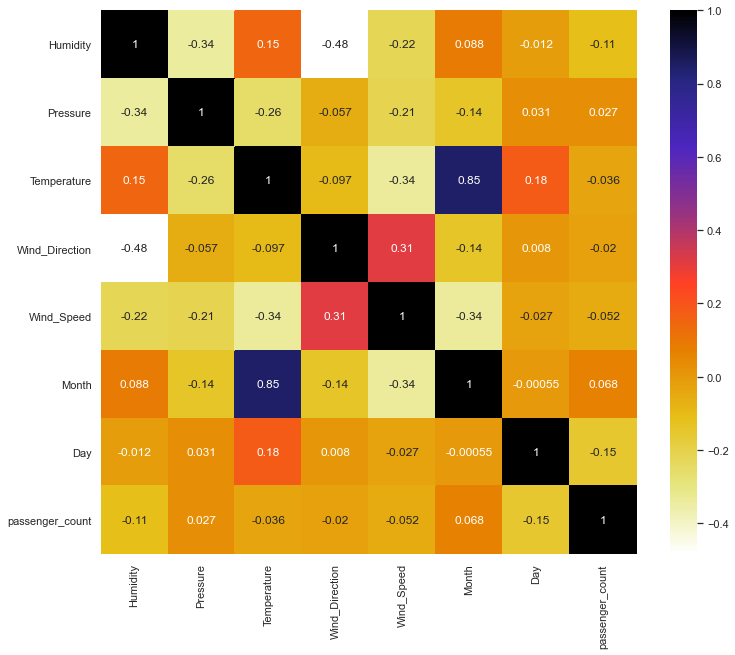

In [49]:
full_data1 = full_data.drop(['Year'], axis='columns')
plt.figure(figsize=(12,10))
cor = full_data1.corr()
sns.heatmap(cor, annot= True, cmap=plt.cm.CMRmap_r)
plt.show()

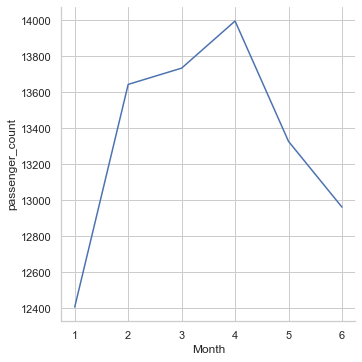

In [50]:
sns.relplot(x="Month", y="passenger_count", ci=None, kind="line", data=full_data)

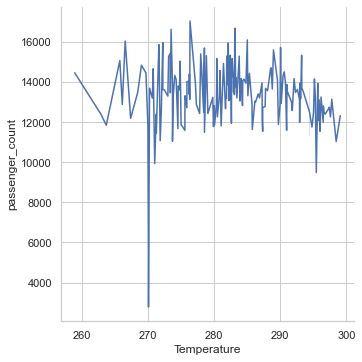

In [51]:
sns.relplot(x="Temperature", y="passenger_count", kind="line", data=full_data);


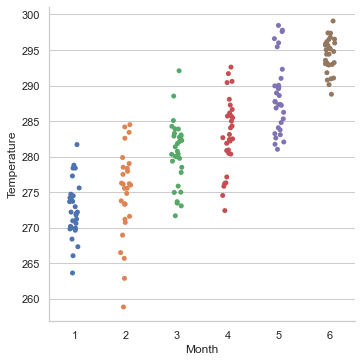

In [52]:
sns.catplot(x="Month", y="Temperature", data=full_data)

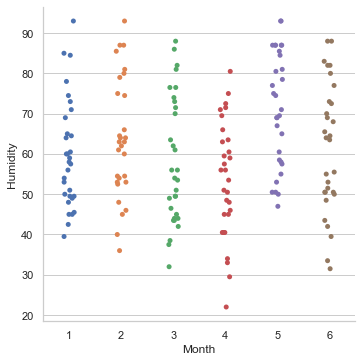

In [53]:
sns.catplot(x="Month", y="Humidity", data=full_data)

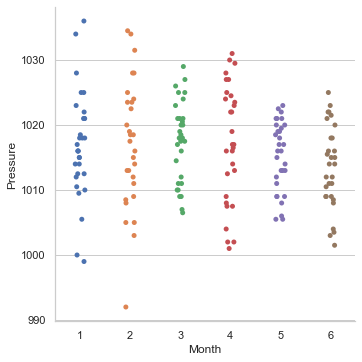

In [54]:
sns.catplot(x="Month", y="Pressure", data=full_data)

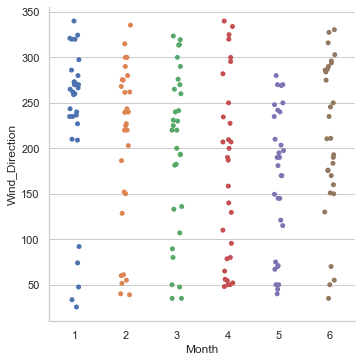

In [55]:
sns.catplot(x="Month", y="Wind_Direction", data=full_data)

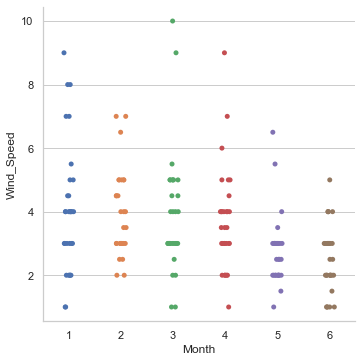

In [56]:
sns.catplot(x="Month", y="Wind_Speed", data=full_data)

In [57]:
full_data.passenger_count.unique()[0]

12877

### ANALYSIS OF WEATHER

In [58]:
weather.head()

,Datetime,Humidity,Pressure,Temperature,Wind_Direction,Wind_Speed,Year,Month,Day
0,2012-10-01,56.5,1012.0,288.525098,261.0,6.0,2012,10,1
1,2012-10-02,52.5,1012.0,289.951841,267.0,5.0,2012,10,2
2,2012-10-03,63.0,1015.0,290.035000,95.0,3.0,2012,10,3
3,2012-10-04,96.5,1017.0,290.735000,40.0,2.0,2012,10,4
4,2012-10-05,94.0,1020.0,293.900000,45.0,1.5,2012,10,5


In [59]:
weather.shape

(1887, 9)

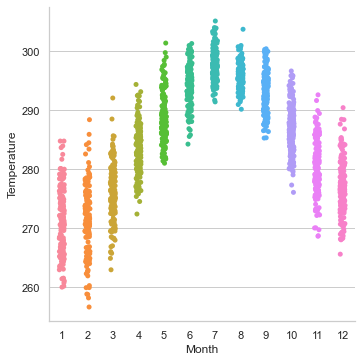

In [60]:
sns.catplot(x="Month", y="Temperature", data=weather)

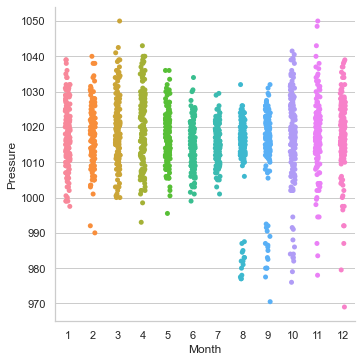

In [61]:
sns.catplot(x="Month", y="Pressure", data=weather)

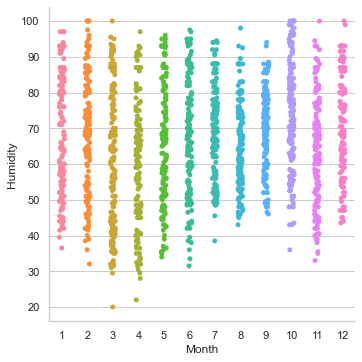

In [62]:
sns.catplot(x="Month", y="Humidity", data=weather)

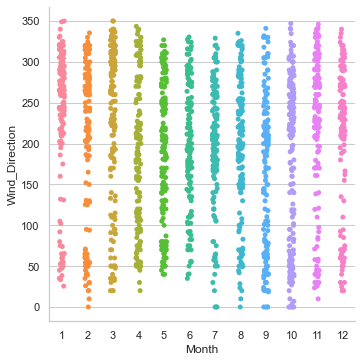

In [63]:
sns.catplot(x="Month", y="Wind_Direction", data=weather)

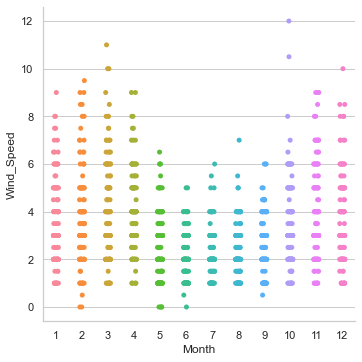

In [64]:
sns.catplot(x="Month", y="Wind_Speed", data=weather)